In [29]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier

In [30]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data"
silver_path = data_path / "silver" / "dreaddit_clean.csv"
df = pd.read_csv(silver_path, usecols= ["text","clean_text","clean_text_sentence_sep",
                                        "singular_pronouns", "avg_word_len",'lex_diversity',"label"])

In [31]:
#Configuracion de visualizaciones 

# Configurar el estilo de fondo con una cuadrícula
sns.set_style("whitegrid")

# Establecer una paleta de colores profesional
sns.set_palette("pastel")

# Configurar la tipografía y el tamaño de la fuente
sns.set_context("paper", font_scale=1.5, rc={"font.family": "sans-serif", "font.sans-serif": ["Helvetica", "Arial"]})

# Desactivar spines innecesarios
sns.despine(trim=True, left=True);

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Registros')

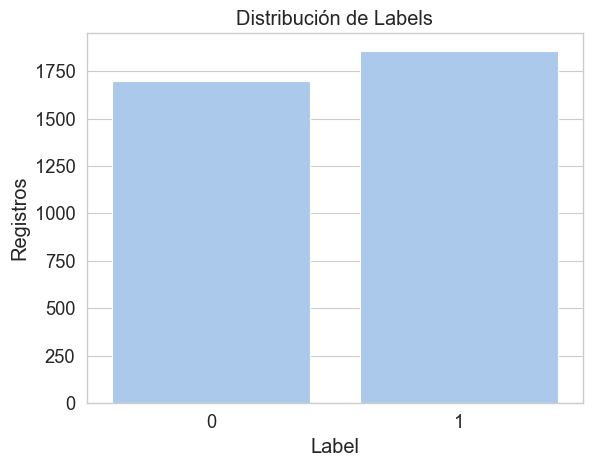

In [32]:
#distribucion de categorias en el label
label_dis = df.label.value_counts().reset_index()

g = sns.barplot(x="label", y="count", data=label_dis)
g.set_title("Distribución de Labels")
g.set_xlabel("Label")
g.set_ylabel("Registros")


In [33]:
features =['singular_pronouns', 'avg_word_len', 'lex_diversity']
X = df.loc[:,features]
y = df.label
feature_corr = X.corr()

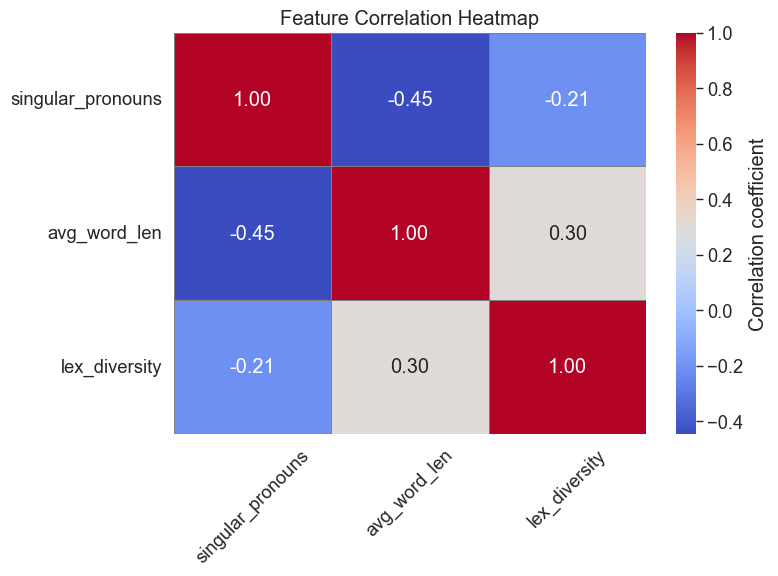

In [34]:
# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(feature_corr, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'}, linewidths=.5, linecolor='gray')

plt.title('Feature Correlation Heatmap')  # Add a title to the heatmap
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

In [43]:
# Fit a model
model = RandomForestClassifier().fit(X.values, y)

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.values)

TypeError: only integer scalar arrays can be converted to a scalar index

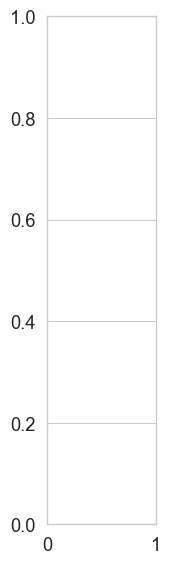

In [42]:
# Plot SHAP values
shap.summary_plot(shap_values, X.values, feature_names=features)

TypeError: only integer scalar arrays can be converted to a scalar index

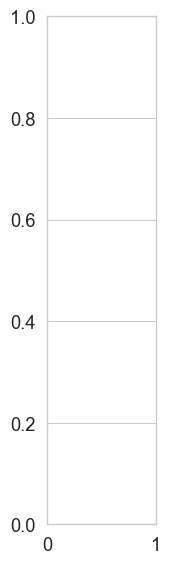

In [35]:
#Explica la importancia de los features para la clasificacion






